In [4]:
import pandas as pd
import json
from pathlib import Path
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [8]:
# obtiene la ruta donde se ejecuta para el metodo Path y concatena con el nombre de la carpeta donde están los archivos
ruta = os.getcwd()
directorio = Path(ruta + '\\src')

# obtiene los nombres de los csv
videos_csv = [video.name for video in directorio.glob('*.csv')]
# obtiene los nombres de los json
cat_json = [video.name for video in directorio.glob('*.json')]

In [9]:
# funcion que obtiene el json del pais correspondiente al video, extrae los ID y los titulos asociados en un dataframe y luego lo une con el df de los csv
def get_title(df, country):
    data = json.load(open(f'src/{country}_category_id.json'))
    df_temp = pd.json_normalize(data['items'], max_level=1)
    df_cat = df_temp[['id','snippet.title']]
    df_cat = df_cat.rename(columns={'snippet.title': 'category', 'id': 'category_id'})
    df_cat['category_id'] = df_cat['category_id'].astype(int)
    df_cat = df.merge(df_cat, how='left', on='category_id')
    return df_cat

In [11]:
# Concatena los dataframe de todos los csv de videos
df_videos = pd.DataFrame()
for video in videos_csv:
    df = pd.read_csv(f'src/{video[:2]}videos.csv', encoding='latin-1')
    df['country'] = video[:2]
    df = get_title(df, video[:2])
    df_videos = pd.concat([df_videos, df], ignore_index=True)
df_videos.head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,category
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA,Comedy
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA,Entertainment
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,CA,Music


In [12]:
# Transforma las 2 columnas de fecha a tipo datetime y luego sustrae ambas para calcular los días que demoro en ser trending
df_videos['trending_date'] = pd.to_datetime(df_videos['trending_date'], format='%y.%d.%m')
df_videos['publish_time'] = pd.to_datetime(df_videos['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
df_videos['publish_time'] = df_videos['publish_time'].dt.date.astype('datetime64[ns]')
df_videos['days_to_trend'] = (df_videos['trending_date'] - df_videos['publish_time']).dt.days
df_videos.head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,category,days_to_trend
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,Music,4
1,0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA,Comedy,1
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA,Comedy,2
3,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA,Entertainment,2
4,2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,CA,Music,5


In [108]:
# Extrae el dia de trending_date y luego crea una tabla pivot para contar la cantidad de videos de cada dia de la semana por pais
df_videos['trending_day'] = df_videos['trending_date'].dt.day_name()
trend_days_table = pd.pivot_table(df_videos,values='title', index='trending_day', columns='country', aggfunc='count')
trend_days_table

country,CA,DE,FR,GB,IN,JP,KR,MX,RU,US
trending_day,,,,,,,,,,
Friday,5787,5791,5773,5528,5289,2970,4955,5735,5785,5793
Monday,5759,5747,5775,5471,5264,2937,4892,5698,5772,5793
Saturday,5990,5993,5980,5739,5617,3022,5055,5925,5947,5993
Sunday,5794,5767,5730,5483,5356,2804,4810,5745,5732,5794
Thursday,5783,5780,5749,5489,5182,2868,4818,5709,5783,5793
Tuesday,5988,5986,5978,5674,5476,2953,5116,5943,5953,5992
Wednesday,5780,5776,5739,5532,5168,2969,4921,5696,5767,5791


In [29]:
def calendar_to_merge(max,min,df):
    # obtiene una fecha de inicio y fin para crear un calendario con todas las fechas y luego lo une con un data frame 
    df_calendar = pd.DataFrame({'publish_time_date' : pd.date_range(start=min, end=max)})
    df_dates = pd.merge(df, df_calendar, on='publish_time_date', how= 'outer')
    return df_dates

In [32]:
# Convierte publish_time en una columna tipo date, obtengo la fecha minima y maxima para la funcion crear calendario.
df_videos['publish_time_date'] = df_videos['publish_time'].dt.date
max_date = df_videos['publish_time_date'].max()
min_date = df_videos['publish_time_date'].min()
# crea una tabla pivot, quita el nombre de las columnas de contry y convierte el index en una columna de fechas tipo datetime
publish_date_table = pd.pivot_table(df_videos,
                                    values='title', 
                                    index='publish_time_date', 
                                    columns='country', 
                                    aggfunc='count').rename_axis(None, axis=1).reset_index()
publish_date_table['publish_time_date'] = pd.to_datetime(publish_date_table['publish_time_date'])
publish_date_table_calendar = calendar_to_merge(max_date,min_date,publish_date_table).fillna(0)
publish_date_table_calendar

,publish_time_date,CA,DE,FR,GB,IN,JP,KR,MX,RU,US
0,2006-07-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2006-07-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2006-07-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2006-07-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2006-07-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4340,2018-06-10,196.0,266.0,248.0,9.0,149.0,297.0,196.0,199.0,288.0,25.0
4341,2018-06-11,192.0,190.0,198.0,22.0,197.0,169.0,139.0,195.0,194.0,36.0
4342,2018-06-12,178.0,176.0,169.0,15.0,110.0,167.0,166.0,134.0,185.0,14.0
4343,2018-06-13,125.0,134.0,153.0,11.0,96.0,145.0,56.0,183.0,177.0,11.0


In [109]:
# divide la columna tags por el separador y luego cuenta la cantidad de palabras que separo para crear una nueva columna
df_videos['tags_per_video'] = df_videos['tags'].str.split(pat='|').str.len()
df_videos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,ratings_disabled,video_error_or_removed,description,country,category,days_to_trend,publish_time_date,engagement_rate,trending_day,tags_per_video
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,...,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,Music,4,2017-11-10,0.043361,Tuesday,6
1,0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,...,False,False,STill got a lot of packages. Probably will las...,CA,Comedy,1,2017-11-13,0.124285,Tuesday,11
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,...,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA,Comedy,2,2017-11-12,0.044086,Tuesday,23
3,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,...,False,False,I know it's been a while since we did this sho...,CA,Entertainment,2,2017-11-12,0.062147,Tuesday,14
4,2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,...,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,CA,Music,5,2017-11-09,0.048117,Tuesday,10


In [105]:
# Divide la columna tags por el separador y los transforma en una fila cada uno.
# Elimina los valores [none], quita las comillas y luego cuenta cada valor del df y lo ordena de forma descendente
df_tags_exploded = df_videos['tags'].str.split('|').explode()
df_tags_sorted = df_tags_exploded[df_tags_exploded!='[none]'].str.replace('"', '').value_counts().sort_values(ascending=False)
df_tags_sorted.head()

tags
funny     15075
comedy    12356
2018      11390
news       6415
music      5918
Name: count, dtype: int64

In [110]:
# Calcula el promedio de tags por video en los videos que fueron tendencia en 3 dias o menos
promedio_tags = df_videos[df_videos['days_to_trend'] <= 3]['tags_per_video'].mean()
print(f'el promedio de tags por videos que fueron tendencia en menos de 3 dias es {promedio_tags:.0f}')


el promedio de tags por videos que fueron tendencia en menos de 3 dias es 17


In [103]:
# Crea una tabla agrupando por pais y por categoria y luego cuenta la cantidad de videos que hay por por cada pais en cada categoria
# luego suma el total de videos por cada pais
# transforma en porcentaje del total de videos por pais, por cada categoria y lo redondea a una cifra
# Aplica la funcion pivot para crear una tabla en cada pais por cada categoria el porcentaje de cada categoria
# cambia los nulos por 0 y crea la anotacion que la dará el formato el heatmap
df_country_cat = df_videos.groupby(['country','category']).size().reset_index(name='porcentaje')
total_videos_pais = df_country_cat.groupby('country')['porcentaje'].transform('sum')
df_country_cat['porcentaje'] = ((df_country_cat['porcentaje'] / total_videos_pais)*100).round(1)
pv_df = df_country_cat.pivot(values='porcentaje', columns='country', index='category')
pv_df = pv_df.fillna(0)
pv_annot = pv_df.map(lambda x: f"{x}%")


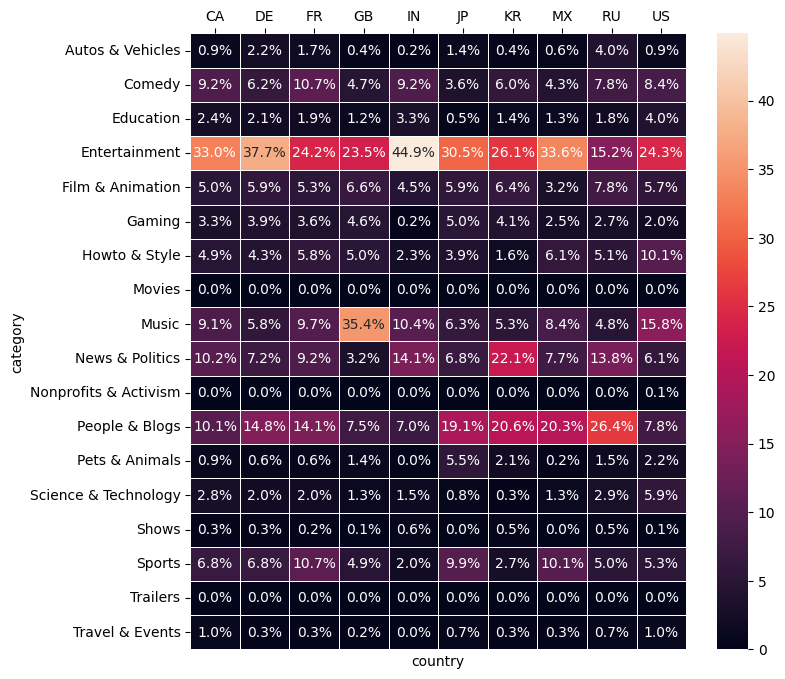

In [104]:
# grafica un heatmap con los datos de la tabla pivot con el formato en la tabla pv annot
plt.figure(figsize=(8,8))
ax = sns.heatmap(pv_df, annot=pv_annot, linewidth=.5, fmt="")
ax.xaxis.tick_top()

In [106]:
# crea la columna engagement rate para el df en cada fila
# crea la tabla df_engagement, agrupa por pais y suma cada like, dislike, views y saca el promedio del engagement rate
# ordena de forma descendente cada pais segun el engagement rate 
df_videos['engagement_rate'] = ((df_videos['likes'] - df_videos['dislikes'])/df_videos['views'])
df_engagement = df_videos.groupby('country').agg({
    'likes' : 'sum',
    'dislikes' : 'sum',
    'views' : 'sum',
    'engagement_rate' : 'mean'
}).reset_index()

df_engagement_sort = df_engagement.sort_values(by='engagement_rate',ascending=False)
df_engagement_sort

,country,likes,dislikes,views,engagement_rate
7,MX,641627186,30223385,13849692994,0.046117
8,RU,506598491,60098157,9806494525,0.042791
2,FR,708144090,33188528,17100897444,0.042274
1,DE,893395538,57059031,24645115205,0.037259
9,US,3041147198,151978155,96671770152,0.032799
3,GB,5234962944,296250384,230069198174,0.032139
0,CA,1618179878,82137919,46891975069,0.032088
4,IN,1011593670,62194142,39610961029,0.020570
6,KR,421247912,18634999,14689152313,0.019853
5,JP,165406898,7528321,5377466630,0.018106


In [111]:
# Agrupa por el dia de la semana y describe por la cantidad de días que toma en ser trend un video segun cada dia de la semana
df_videos.groupby('trending_day')['days_to_trend'].describe()

,count,mean,std,min,25%,50%,75%,max
trending_day,,,,,,,,
Friday,53406.0,6.904749,91.367308,0.0,1.0,1.0,3.0,3987.0
Monday,53108.0,8.135159,104.016041,0.0,1.0,1.0,3.0,4215.0
Saturday,55261.0,6.972784,92.197105,0.0,1.0,1.0,3.0,3988.0
Sunday,53015.0,7.393455,96.669751,0.0,1.0,2.0,3.0,3989.0
Thursday,52954.0,7.248574,93.515579,0.0,1.0,1.0,3.0,3986.0
Tuesday,55059.0,8.271745,104.853452,0.0,1.0,1.0,3.0,3984.0
Wednesday,53139.0,7.556691,97.944790,0.0,1.0,1.0,3.0,3985.0


Podemos notar que para la mayoria de los datos coinciden para todos los días o varian muy poco como para concluir que el día de la semana en que un video es publicado, influye en los días que le toma para ser trending.

In [112]:
# Crea una pivot table con el promedio del engagement rate para la combinación de comentarios y ratings habilitados y deshabilitados
pivot_table = pd.pivot_table(df_videos, values='engagement_rate', index='comments_disabled', columns='ratings_disabled', aggfunc='mean')
print(pivot_table)

ratings_disabled      False  True 
comments_disabled                 
False              0.034477    0.0
True               0.013852    0.0


Los videos con comentarios deshabilitados tienen un mucho menor engagement rate que los que los tienen habilitados. Para los que tienen el rating deshabilitado, da 0 ya que no posee likes ni dislikes.